# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.io as pio
import plotly.express as px
import statsmodels.api as sm

pio.renderers.default = "vscode"
plt.rcParams["figure.figsize"] = (6,4)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Reading & Cleaning Data 

In [2]:
df = pd.read_csv(r'E:\New folder\Employee Attrition Project\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

# Categorize Data

In [7]:
numeric_col = df.select_dtypes(include= ['int64']).columns.to_list()
numeric_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
categorical_col = df.select_dtypes(include= ['object']).columns.to_list()
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# Outliers Detection

In [9]:
def plot_all_boxplots(df, num_col):
    # Create subplots: 1 row and as many columns as there are numeric columns
    n = len(num_col)
    fig = sp.make_subplots(rows=1, cols=len(num_col), subplot_titles=num_col, horizontal_spacing = min(0.04, 1 / (n * 2)))  # Adjust spacing between subplots

    # Loop over the numeric columns and create a box plot for each
    for i, col in enumerate(num_col):
        fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

    fig.update_layout(height=500, width=300 * len(num_col), title_text="Box Plots of Numeric Columns")
    fig.show()

plot_all_boxplots(df, numeric_col)

In [10]:
df.to_csv("cleaned_data.csv", index=False) 

# Analysis and Exploring Relations

Attrition Rate = 16.12 %


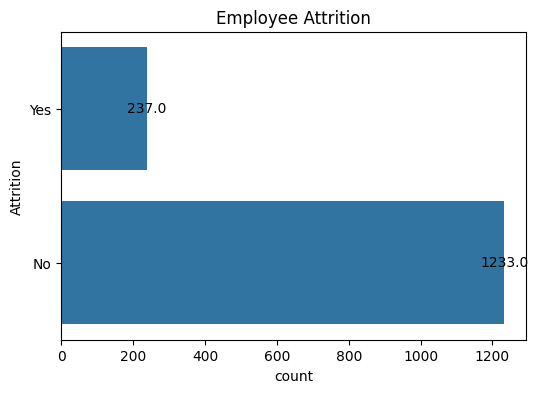

In [11]:
#Attrition Number and percentage

Attritions = df[df['Attrition'] == 'Yes'].value_counts().sum()
Total_Employees = df['Attrition'].value_counts().sum()

print(f'Attrition Rate = {Attritions/Total_Employees * 100:.2f} %')

plt.figure()
ax = sns.countplot(data=df, y= 'Attrition')
for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center')
plt.title('Employee Attrition')
plt.show()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64
Highest 5 Attrition Age
31    18
29    18
28    14
33    12
26    12
Name: count, dtype: int64


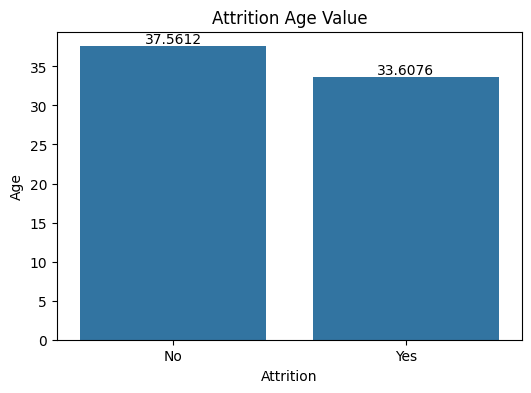

In [12]:
#Age Effect on Attrition

age_effect = df.groupby('Attrition')['Age'].mean()
top5_ages = df[df['Attrition']=='Yes']['Age'].value_counts().nlargest(5)
print(f'{age_effect}')
print(f'Highest 5 Attrition {top5_ages}')

ax = sns.barplot(data = age_effect)
ax.bar_label(ax.containers[0])
plt.title('Attrition Age Value')
plt.show()

I found here that the age is not real reason cause attrition because the average of reassigned employees age is approximately 34. 

In [13]:
#Departments effect on Attrition

dep_effect = df[df['Attrition']=='Yes']['Department'].value_counts().reset_index()
dep_effect.columns = ['Department' , 'Count']

fig = px.pie(dep_effect,
             names= 'Department',
             values= 'Count',
             title= 'Departments Attrition'   
            )
fig.show()

I found here that the most department has reassigned employees is Research & Development and secondly comes Sales departement and hR departement has the least percentage with big gap between other two departements

In [14]:
#Distance from home effect on Attrition

distance_effect = df[df['Attrition'] == 'Yes'].groupby('DistanceFromHome')['Attrition'].value_counts().reset_index(name='Attirtion Count')
fig = px.line(distance_effect,
              x = 'DistanceFromHome',
              y = 'Attirtion Count',
              title = 'Distance From Home Attrition effect',
              labels={'DistanceFromHome' : 'Distance From Home in KM' , 'Attirtion Count' : 'No.of employees resigned'},markers=True
             )
fig.show()

I found here that there is no obvious or important relation between distance from home of the employees and attritions and long distance don't effect as i was expected

Gender
Male      150
Female     87
Name: count, dtype: int64


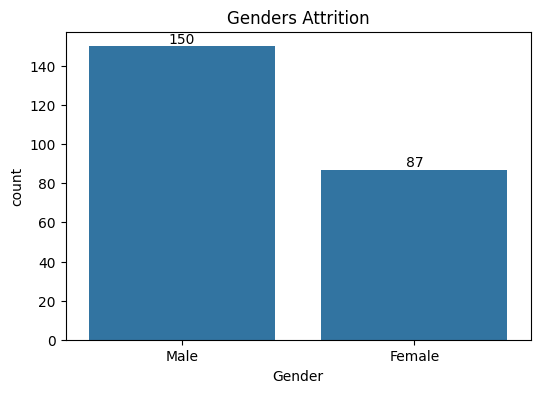

In [15]:
#Gender relation with Attrition

gender_effct = df[df['Attrition']=='Yes']['Gender'].value_counts()
print(f'{gender_effct}')

ax = sns.barplot(data=gender_effct)
ax.bar_label(ax.containers[0])
plt.title('Genders Attrition')
plt.show()

I found here the males have the more ressigned employees than females

JobRole
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: count, dtype: int64


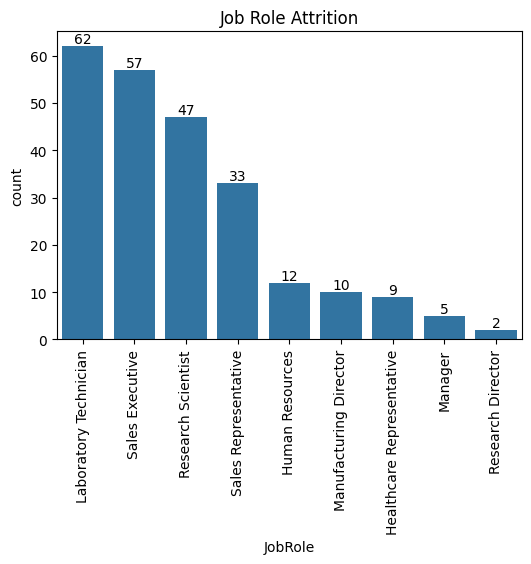

In [16]:
#Job Role effect on attrition

jobrole_effect = df[df['Attrition']=='Yes']['JobRole'].value_counts()
print(f'{jobrole_effect}')

ax = sns.barplot(data=jobrole_effect)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title('Job Role Attrition')
plt.show()

As I found that the most departments having ressigned employees so the roles in these departments has the most specially labortory technican

JobSatisfaction
3    73
1    66
4    52
2    46
Name: count, dtype: int64


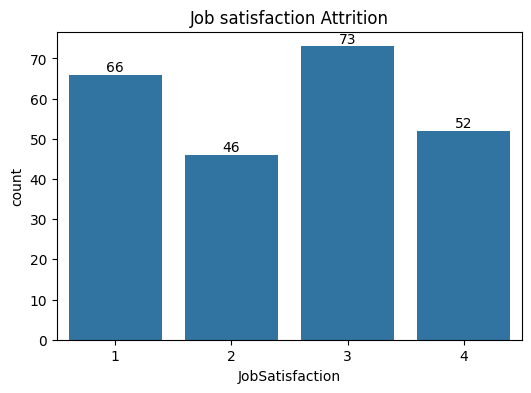

In [17]:
#Job Satistfication Rate effect on attrition

jobsatis_effect = df[df['Attrition']=='Yes']['JobSatisfaction'].value_counts()
print(f'{jobsatis_effect}')

ax = sns.barplot(data=jobsatis_effect)
ax.bar_label(ax.containers[0])
plt.title('Job satisfaction Attrition')
plt.show()


I found that there is no strong effect of job satisfaction rate on attrition

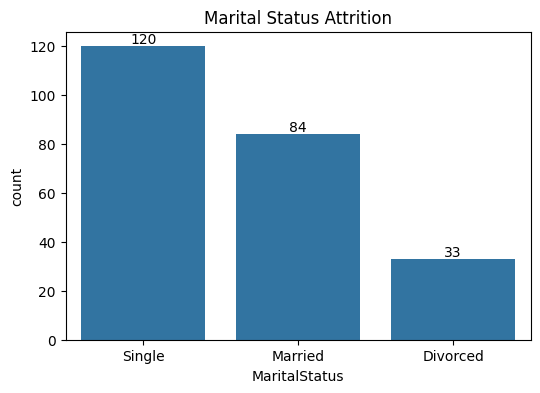

In [18]:
#Marital Status Relation with Attrition

marital_effect = df[df['Attrition']=='Yes']['MaritalStatus'].value_counts()

ax = sns.barplot(data=marital_effect)
ax.bar_label(ax.containers[0])
plt.title('Marital Status Attrition')
plt.show()

I found that the single employees are the most perscentage in attritions and secondly comes Married and lastly with small portion are divorced

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


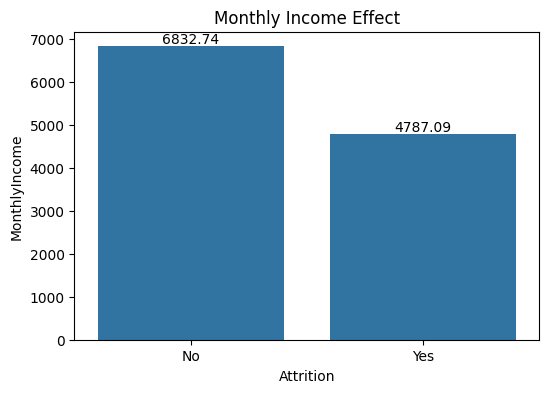

In [19]:
#Monthly income effect on attrition

income_effect = df.groupby('Attrition')['MonthlyIncome'].mean()
print(f'{income_effect}')

ax = sns.barplot(data=income_effect)
ax.bar_label(ax.containers[0])
plt.title('Monthly Income Effect')
plt.show()

I found here that's average monthly income of ressigned employees is very low so it's seems that it is from the biggest reasons for attritions

In [20]:
#Salary Hike Percent effect on attrition


salaryhike_effect = df.groupby('PercentSalaryHike')['Attrition'].value_counts().unstack().reset_index()

fig = px.line(salaryhike_effect,
              x = 'PercentSalaryHike',
              y = 'Yes',
              title = 'Attrition by Salary Hike Percent',
              labels={'Yes' : 'No. of resigned employees' , 'PercentSalaryHike' : 'PercentSalaryHike'},markers=True      
             )
fig.show()

I found here that salary hike percent has strong effect on attrition

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: count, dtype: int64


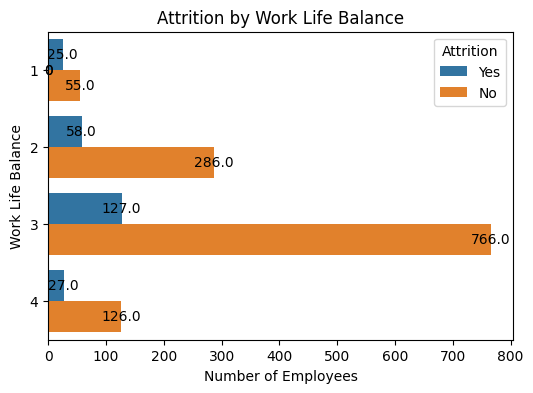

In [21]:
#Work Life Balance effect on attrition

worklife_effect = df.groupby('WorkLifeBalance')['Attrition'].value_counts()
print(f'{worklife_effect}')

ax = sns.countplot(data=df, y='WorkLifeBalance', hue='Attrition')
for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center')
plt.title('Attrition by Work Life Balance')
plt.ylabel('Work Life Balance')
plt.xlabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

There is no strong relaton found between work life balance rate and attrition

In [22]:
YearsAtCompany_effect = df.groupby('YearsAtCompany')['Attrition'].value_counts().unstack().reset_index()

fig = px.line(YearsAtCompany_effect,
              x = 'YearsAtCompany',
              y = 'Yes',
              title = 'Attrition by Years at Company',
              labels={'Yes' : 'Attritions' , 'YearsAtCompany' : 'Years at Company'},markers=True      
             )
fig.show()

In [23]:
#Years in current role effect on attrition

YearsInCurrentRole_effect = df.groupby('YearsInCurrentRole')['Attrition'].value_counts().unstack().reset_index()

fig = px.line(YearsInCurrentRole_effect,
              x = 'YearsInCurrentRole',
              y = 'Yes',
              title = 'Attrition by Years In Current Role',
              labels={'Yes' : 'Attritions' , 'YearsInCurrentRole' : 'Years in Current Role'},markers=True      
             )
fig.show()

I found here the the highest percentage of attritions mostly in the new employees in the role and the employees with the longest years in the postion and in between the  rest is distributed

In [24]:
#Yeasr since last promotion effect on attrition 

YearsSinceLastPromotion_effect = df.groupby('YearsSinceLastPromotion')['Attrition'].value_counts().unstack().reset_index()

fig = px.line(YearsSinceLastPromotion_effect,
              x = 'YearsSinceLastPromotion',
              y = 'Yes',
              title = 'Attrition by Years Since Last Promotion',
              labels={'Yes' : 'Attritions' , 'YearsSinceLastPromotion' : 'Years Since Last Promotion'},markers=True      
             )
fig.show()

I found here that Years since last promotion don't effect the employee and let hem to resign

In [25]:
#Years with current manager effect on attrition

YearsWithCurrManager_effect = df.groupby('YearsWithCurrManager')['Attrition'].value_counts().unstack().reset_index()

fig = px.line(YearsWithCurrManager_effect,
              x = 'YearsWithCurrManager',
              y = 'Yes',
              title = 'Attrition by Years With Current Manager',
              labels={'Yes' : 'Attritions' , 'YearsWithCurrManager' : 'Years With Current Manager'},markers=True      
             )
fig.show()

I found here the the curve on attrition percentage rate decrease with the employees stayed more years with the current manager

# Statistical Analysis

In [26]:
#Correlation Matrix For Numeric Features

correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                color_continuous_scale='Blues', 
                title="Correlation Matrix of Numeric Columns",
                width=1000,  
                height=1000)

fig.show()

In [27]:
#Normality Test by Shapiro

from scipy.stats import shapiro
for col in numeric_col:
    stat,p = shapiro(df[col])
    print(f"{col}: p-value = {p}")


Age: p-value = 2.036924313471394e-14
DailyRate: p-value = 5.3293297427466034e-21
DistanceFromHome: p-value = 4.080847148972682e-34
Education: p-value = 1.7257118214899497e-30
EmployeeCount: p-value = 1.0
EmployeeNumber: p-value = 2.001322953505441e-21
EnvironmentSatisfaction: p-value = 2.7378881881962794e-35
HourlyRate: p-value = 7.418846333333586e-21
JobInvolvement: p-value = 1.6135979175783585e-38
JobLevel: p-value = 1.4993547154229163e-37
JobSatisfaction: p-value = 1.3734335097160986e-35
MonthlyIncome: p-value = 4.402394036501214e-37
MonthlyRate: p-value = 5.516502411789927e-21
NumCompaniesWorked: p-value = 2.632103225352712e-35
PercentSalaryHike: p-value = 7.480739720656507e-30
PerformanceRating: p-value = 1.1597196608929545e-55
RelationshipSatisfaction: p-value = 7.030158816904776e-35
StandardHours: p-value = 1.0
StockOptionLevel: p-value = 6.100995949798965e-40
TotalWorkingYears: p-value = 5.630922142287559e-29
TrainingTimesLastYear: p-value = 1.5831306466695062e-30
WorkLifeBalan

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: Input data has range zero. The results may not be accurate.



All features are upnormal except Employee count & standard hours

In [28]:
#Mann-Whitney U

from scipy.stats import mannwhitneyu

def mann_whitney_test(df, dep, indep, group1, group2):
    data1 = df[df[indep] == group1][dep].dropna()
    data2 = df[df[indep] == group2][dep].dropna()

    stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

    print(f'Mann-Whitney U Test between {dep} for {group1} vs {group2}')
    print(f'P-Value = {p_value:.4f}')

    if p_value < 0.05:
        print('There is significant difference between the two groups at 95% confidence.')
    else:
        print('There is no significant difference between the two groups at 95% confidence.')


In [29]:
#Chi-Square

from scipy.stats import chi2_contingency

def chi_square_test(df, var1, var2):
    table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, dof, expected = chi2_contingency(table)

    print(f'Chi-Square Test between {var1} and {var2}')
    print(f'P-Value = {p_value:.4f}')

    if p_value < 0.05:
        print('There is a significant association between the two variables at 95% confidence.')
    else:
        print('There is no significant association between the two variables at 95% confidence.')


In [30]:
for col in numeric_col:
    mann_whitney_test(df, col, 'Attrition', 'Yes', 'No')

Mann-Whitney U Test between Age for Yes vs No
P-Value = 0.0000
There is significant difference between the two groups at 95% confidence.
Mann-Whitney U Test between DailyRate for Yes vs No
P-Value = 0.0290
There is significant difference between the two groups at 95% confidence.
Mann-Whitney U Test between DistanceFromHome for Yes vs No
P-Value = 0.0024
There is significant difference between the two groups at 95% confidence.
Mann-Whitney U Test between Education for Yes vs No
P-Value = 0.2448
There is no significant difference between the two groups at 95% confidence.
Mann-Whitney U Test between EmployeeCount for Yes vs No
P-Value = 1.0000
There is no significant difference between the two groups at 95% confidence.
Mann-Whitney U Test between EmployeeNumber for Yes vs No
P-Value = 0.6911
There is no significant difference between the two groups at 95% confidence.
Mann-Whitney U Test between EnvironmentSatisfaction for Yes vs No
P-Value = 0.0002
There is significant difference between 

After i done mann-whitney test to see the difference between numeric columns and attrition(target) between yes and no groups we found those that have significant difference :-

Age

Daily rate

Distance from home

Environment satisfaction 

Job involvement 

Job level

Job satisfaction 

Monthly income

Stock option level

Total working years

Training times last year

Work life balance

Years at company

Years in current role

Years since last promotion 

Years with current manager

In [31]:
for col in categorical_col:
    chi_square_test(df , 'Attrition' , col)

Chi-Square Test between Attrition and Attrition
P-Value = 0.0000
There is a significant association between the two variables at 95% confidence.
Chi-Square Test between Attrition and BusinessTravel
P-Value = 0.0000
There is a significant association between the two variables at 95% confidence.
Chi-Square Test between Attrition and Department
P-Value = 0.0045
There is a significant association between the two variables at 95% confidence.
Chi-Square Test between Attrition and EducationField
P-Value = 0.0068
There is a significant association between the two variables at 95% confidence.
Chi-Square Test between Attrition and Gender
P-Value = 0.2906
There is no significant association between the two variables at 95% confidence.
Chi-Square Test between Attrition and JobRole
P-Value = 0.0000
There is a significant association between the two variables at 95% confidence.
Chi-Square Test between Attrition and MaritalStatus
P-Value = 0.0000
There is a significant association between the two var

After i have done chi-square test to see the columns having significant association found those are that have:-

Buisness travel

Departement

Education field

Job role

Marital status 

Over time